In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
#import easyocr

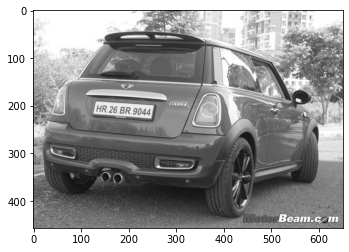

In [2]:
img = cv2.imread('image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

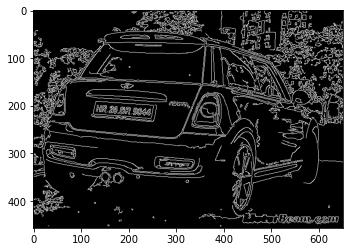

In [3]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [4]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [5]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [6]:
location

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

In [7]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

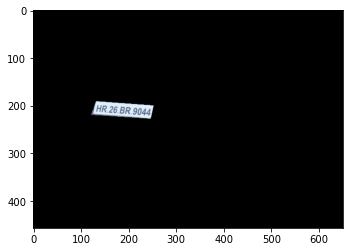

In [8]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [9]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

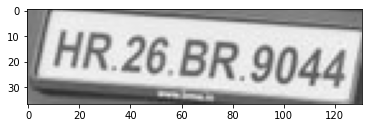

In [10]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [11]:
import easyocr

In [12]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\Dheeraj Singla\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR.9044', 0.5728024956877317)]

In [13]:
plate_number = result[0][-2]

In [14]:
plate_number

'HR.26 BR.9044'

In [15]:
plate_number = plate_number.replace( ' ', '')

In [ ]:
plate_number[6:]

In [16]:
plate_number = plate_number.replace('.','')

In [17]:
plate_number

'HR26BR9044'

In [18]:
type(plate_number)

str

In [19]:
import requests
import xmltodict
import json

In [20]:
from xml.parsers import expat

In [21]:
def get_vehicle_info(plate_number):
    r = requests.get("http://www.regcheck.org.uk/api/reg.asmx/CheckIndia?RegistrationNumber={0}&username=dheeraj".format(str(plate_number)))
    print(r.status_code)
    data = xmltodict.parse(xml_input = r.content, expat = expat)
    jdata = json.dumps(data)
    df = json.loads(jdata)
    df1 = json.loads(df['Vehicle']['vehicleJson'])
    return df1

In [22]:
get_vehicle_info(plate_number)

200


{'Description': 'Toyota Innova',
 'RegistrationYear': None,
 'CarMake': {'CurrentTextValue': 'Toyota'},
 'CarModel': {'CurrentTextValue': 'Innova'},
 'EngineSize': {'CurrentTextValue': '2.5 Liter'},
 'MakeDescription': {'CurrentTextValue': 'Toyota'},
 'ModelDescription': {'CurrentTextValue': 'Innova'},
 'VechileIdentificationNumber': 'MBJ11JV4007310006',
 'Location': 'GURUGRAM NORTH , Haryana',
 'ImageUrl': 'http://in.carregistrationapi.com/image.aspx/@VG95b3RhIElubm92YQ=='}

In [ ]:
def get_info():
    import sys
    import requests
    from bs4 import BeautifulSoup, SoupStrainer

    home_url = 'https://parivahan.gov.in/rcdlstatus/?pur_cd=102'
    post_url = 'https://parivahan.gov.in/rcdlstatus/vahan/rcDlHome.xhtml'

    first = 'MH02CL'

    second = '0555'

    r = requests.get(url=home_url)
    cookies = r.cookies
    soup = BeautifulSoup(r.text, 'html.parser')
    viewstate = soup.select('input[name="javax.faces.ViewState"]')[0]['value']

    data = {
    'javax.faces.partial.ajax':'true',
    'javax.faces.source': 'form_rcdl:j_idt59',
    'javax.faces.partial.execute':'@ALL',
    'javax.faces.partial.render': 'form_rcdl:pnl_show form_rcdl:pg_show form_rcdl:rcdl_pnl',
    'form_rcdl:j_idt59':'form_rcdl:j_idt59',
    'form_rcdl':'form_rcdl',
    'form_rcdl:tf_reg_no1': first,
    'form_rcdl:tf_reg_no2': second,
    'javax.faces.ViewState': viewstate,
    }

    r = requests.post(url=post_url, data=data, cookies=cookies)
    soup = BeautifulSoup(r.text, 'html.parser')
    table = SoupStrainer('tr')
    soup = BeautifulSoup(soup.get_text(), 'html.parser', parse_only=table)
    print(soup.get_text())

In [ ]:
get_info()

In [ ]:
first = 'MH02CL'
# The last four digits: 0555
second = '0555'